 
# 1. Introduction  
In this project, we will predict whether a customer will ("soon") stop doing business with SyriaTel, a telecommunications company by buiding a classifier based on many factors.





## 1.1. Business Understanding  



### 1.1.1. Problem  
The telecommunications sector has become one of the main industries in developed countries. The technical progress and the increasing number of operators has raised the level of competition. Companies are working hard to survive in this competitive market depending on multiple strategies. This becomes a problem, as Telecom companies usually incur huge costs to attract subscribers.Since it is costly to lose customers, the goal is to use this data to identify customers that are likely to churn, and take measures to keep them from doing so.  

### 1.1.2. Aim  
Due to the direct effect on the revenues of the companies, especially in the telecom field, SyriaTel is seeking to develop means to predict potential customer to churn. Therefore, finding factors that increase customer churn is important to take necessary actions to reduce this churn. The main contribution of our work is to develop a churn prediction model which assists SyriaTel Company to predict customers who are most likely subject to churn.


## 2.2. Objectives  
-To build a ML model that predicts the customers that are most likely to churn with an acceptably high accuracy.  
-To compare different ML models predictions to achieve highest accuracy.  
-Factors that increase customer churn.  
-Identify customers that are likely to churn.
-Advice the Company on best strategy.



# 1.2. Data Understanding

We going to perform Exploratory Data Analysis as part of the steps towards building and deploying a churn prediction model, based on the dataset from Kaggle which is an online community of data scientists and machine learning practitioners.     
For this project i only have one data set to use.  
The target variable will be churn which indicates a true if a customer churns and false if the customer does not churn.  
The features include:  
State    
Account length  
phone number
International plan  
voice mail plan  
voice messages  





## 1.3. Requirements

Import the necessary Libraries  
Get the Big Picture  
Inspect Missing Values  
Inspect the Dependent Variable  
Insect the Numeric Independent Variable  
Inspect Outliers  
Find other relationships  

## 2. Data Preparation

## 2.1. Loading Libraries  
Loading all relevant libraries for this notebook

In [6]:
#load relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

pd.set_option("display.max_columns",None)

import warnings
warnings.filterwarnings("ignore") 


## 2.2. Loading Datasets

In [7]:
# Loading datasets
dataset = pd.read_csv('bigml_59c28831336c6604c800002a.csv')
dataset.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


## 2.3 Explore dataframes  
 Descriptive exploration of data

In [8]:
#create a copy of the dataset without changing the original 
data = dataset.copy()

In [9]:
#Determining the no. of records in our dataset
data.shape

(3333, 21)

In [10]:
# Check dataframe information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [11]:
# Get unique values for columns
data.nunique()

state                       51
account length             212
area code                    3
phone number              3333
international plan           2
voice mail plan              2
number vmail messages       46
total day minutes         1667
total day calls            119
total day charge          1667
total eve minutes         1611
total eve calls            123
total eve charge          1440
total night minutes       1591
total night calls          120
total night charge         933
total intl minutes         162
total intl calls            21
total intl charge          162
customer service calls      10
churn                        2
dtype: int64

In [12]:
# Check dataframe description
data.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [17]:
# Identifying the Missing Data
data.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [18]:
#checking for duplicates
data.duplicated().sum()

0

In [15]:
#inspect the dependent variable
data.groupby('churn').size()

churn
False    2850
True      483
dtype: int64

<AxesSubplot:xlabel='churn', ylabel='count'>

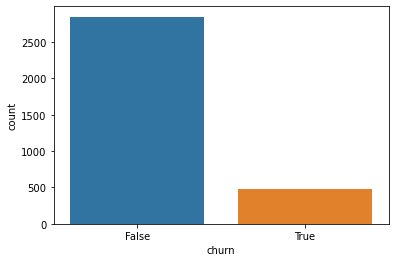

In [16]:
#checking the distribution of the target variable
sns.countplot(x = "churn",data =data)

#### Observation  
-There are no duplicates nor missing values in our dataset.
-This is a slightly unbalanced dataset

## 2.4. Data Cleaning